In [1]:
!pip install geemap --quiet --no-cache-dir

In [2]:
import geemap
import ee

In [3]:
ee.Initialize(project='ee-aprilianidia')

 extract methane data

In [4]:
from netCDF4 import Dataset
import numpy as np
from pathlib import Path

dir_path = Path.cwd()
file_name = 'reservoir_area.nc'
file_path = dir_path / file_name

file_id = Dataset(file_path)

print(file_id.variables.keys())

dict_keys(['crs', 'lon', 'lat', 'total_fraction', 'total_area', 'boreal_area', 'temperate_area', 'tropical_subtropical_area'])


In [9]:
# plot multiple NetCDF data

import numpy as np
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

data = Dataset(r'C:\Users\Aprilia Nidia\testing\1-Data\1-GRIDmethane\Global_Reservoirs_Methane_1918\data\reservoir_methane_emissions.nc')
print(data)
# print(data.variables.keys())

lats = data.variables['lat'][:]
lons = data.variables['lon'][:]
met = data.variables['total_emission_rate'][:,:]

# print('The maximum value is', np.max(met), data.variables['total_emission_rate'].units)
# print('The minimum value is', np.min(met), data.variables['total_emission_rate'].units)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    comment: Contact for questions: Matthew Johnson (matthew.s.johnson@nasa.gov)
    publisher_type: institution
    publisher_institution: Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC)
    publisher_url: daac.ornl.gov
    publisher_email: uso@daac.ornl.gov
    Conventions: CF-1.6
    title: Daily rates of methane emissions from inland dam-reservoir systems
    dimensions(sizes): day(365), nv(2), lon(1440), lat(720)
    variables(dimensions): float32 climatology_bounds(day, nv), int32 crs(), float32 time(day), float64 lon(lon), float64 lat(lat), float32 emission_season(lat, lon), float32 total_emission_rate(day, lat, lon), float32 boreal_emission_rate(day, lat, lon), float32 temperate_emission_rate(day, lat, lon), float32 tropical_subtropical_emission_rate(day, lat, lon)
    groups: 


C:\Users\Aprilia Nidia\AppData\Local\Temp\ipykernel_24612\3994233903.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmmap = plt.cm.get_cmap("jet")


NameError: name 'k' is not defined

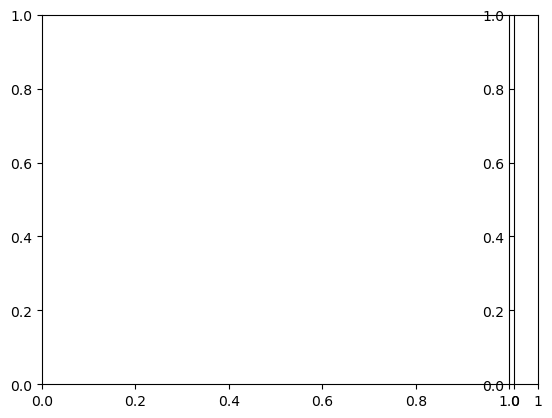

In [13]:
sic = data.variables['total_emission_rate'][:]

cmmap = plt.cm.get_cmap("jet")
cmmap.set_bad('dimgrey', 1.)
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(k, cmap=cmmap, vmin=0, vmax=100)

fig.colorbar(im, cax=cax, orientation='vertical', label='label')